In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\nyp\Sem 6\MLOPS\IT3385_Used_Car\data\raw\02_Used_Car_Prices.xlsx"
df = pd.read_excel(file_path)

In [2]:
# Display basic information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand_Model        6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price (INR Lakhs)  6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [3]:
# Display first few rows
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
                        Brand_Model    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price (INR Lakhs)  
0           175000.0  
1          12

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Brand_Model           0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price (INR Lakhs)     0
dtype: int64


In [ ]:
# Convert Mileage to numeric
df['Mileage'] = df['Mileage'].str.replace(' kmpl', '', regex=True).str.replace(' km/kg', '', regex=True)
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')  # Convert to float, force errors to NaN
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)

# Convert Engine to numeric
df['Engine'] = df['Engine'].str.replace(' CC', '', regex=True).astype(float)
df['Engine'].fillna(df['Engine'].mode()[0], inplace=True)

# Convert Power to numeric
df['Power'] = df['Power'].str.replace(' bhp', '', regex=True)
df['Power'] = pd.to_numeric(df['Power'], errors='coerce')  # Convert to float, force errors to NaN
df['Power'].fillna(df['Power'].median(), inplace=True)

# Fill missing Seats values using mode
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

# Confirm no more missing values
print(df.isnull().sum())

Brand_Model          0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price (INR Lakhs)    0
dtype: int64


In [6]:
# Rename Columns for Consistency
df.rename(columns={'Price (INR Lakhs)': 'Price'}, inplace=True)

In [7]:
# Summary Statistics
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6.019000e+03
mean,2013.358199,5.873838e+04,18.134966,1618.738827,112.883539,5.276790,9.479468e+05
std,3.269742,9.126884e+04,4.581528,600.445858,53.283701,0.806346,1.118792e+06
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,4.400000e+04
25%,2011.000000,3.400000e+04,15.170000,1197.000000,78.000000,5.000000,3.500000e+05
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,5.640000e+05
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000e+05
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,1.600000e+07


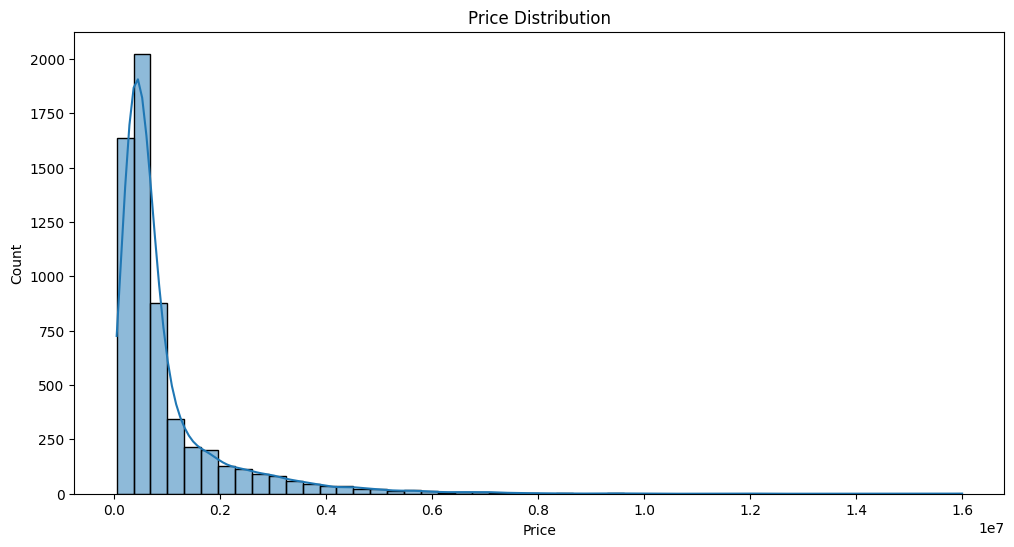

In [8]:
# Visualizing Distribution of Numeric Features

plt.figure(figsize=(12,6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

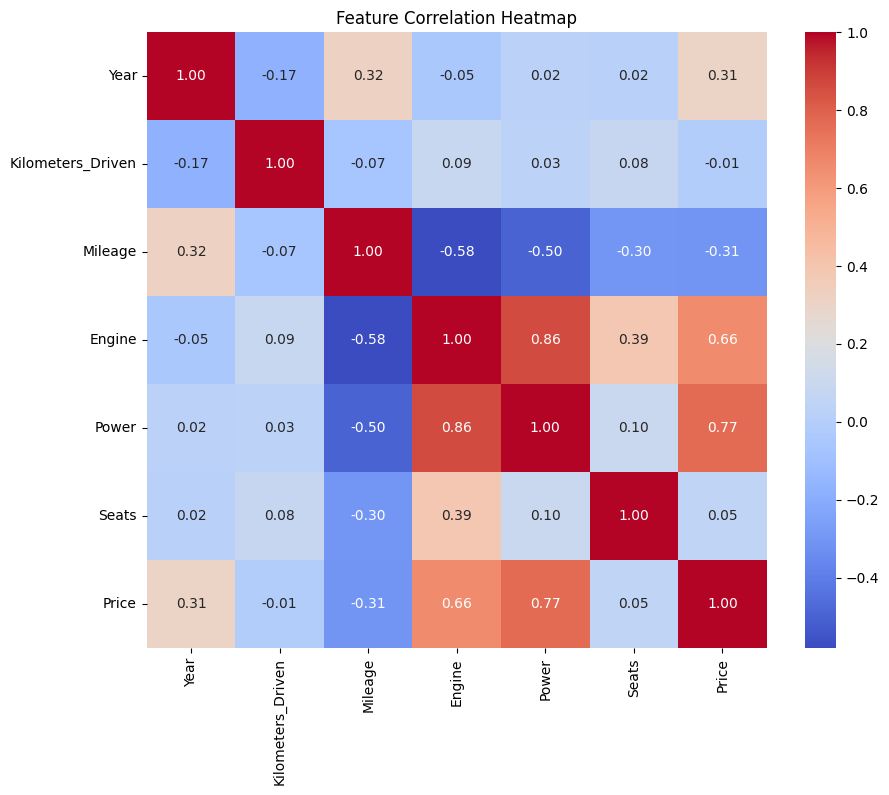

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

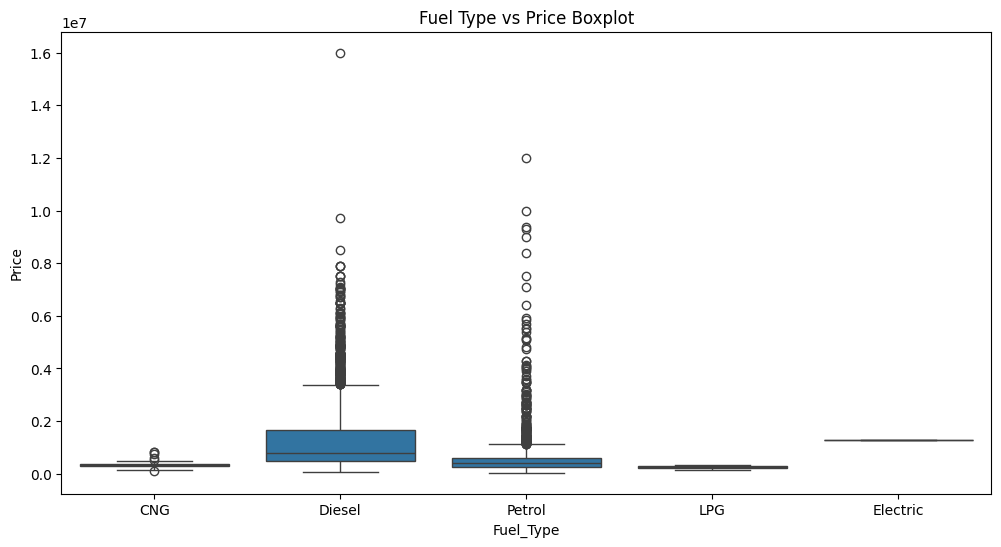

In [10]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Fuel_Type'], y=df['Price'])
plt.title("Fuel Type vs Price Boxplot")
plt.show()

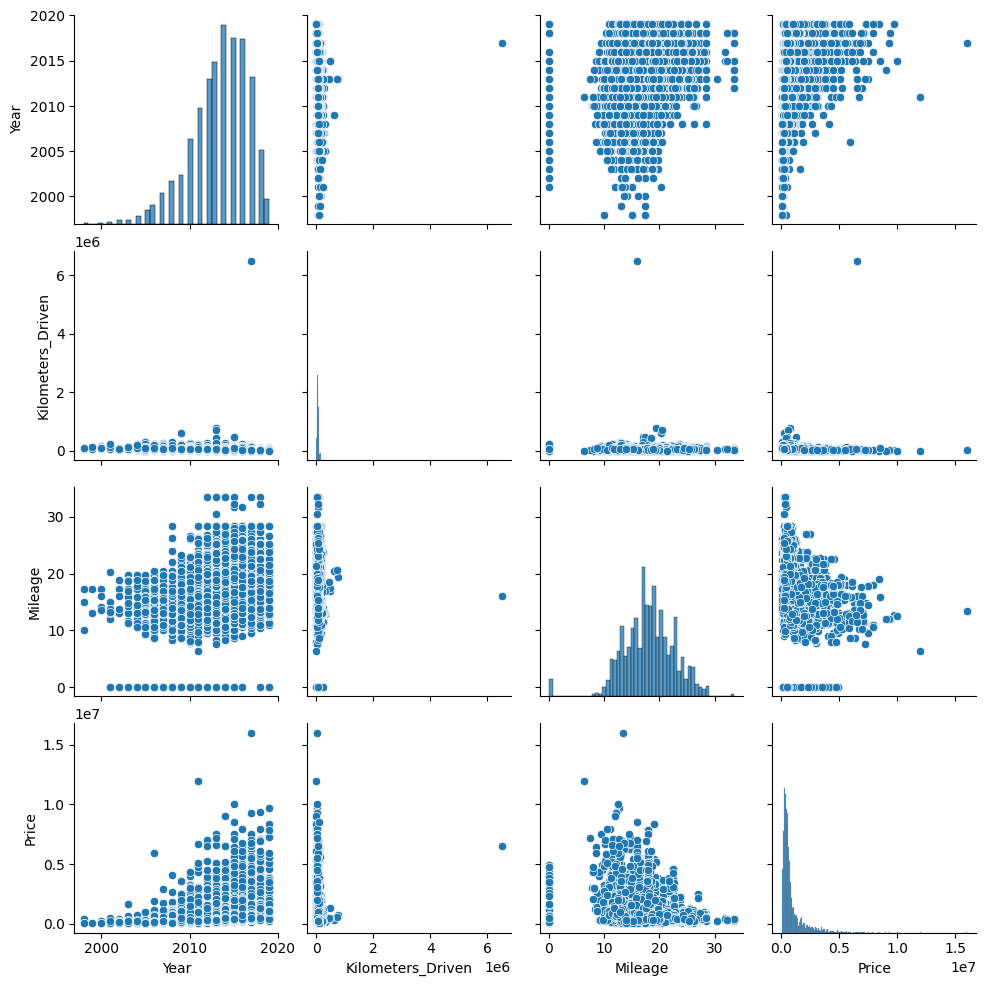

In [11]:
# Pairplot for Relationships
sns.pairplot(df[['Year', 'Kilometers_Driven', 'Mileage', 'Price']])
plt.show()

In [12]:
# Display summary statistics
df.describe(include='all')

,Brand_Model,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6019.000000,6019.000000,6019.000000,6019.000000,6.019000e+03
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,49,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134966,1618.738827,112.883539,5.276790,9.479468e+05
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,4.581528,600.445858,53.283701,0.806346,1.118792e+06
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,4.400000e+04
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1197.000000,78.000000,5.000000,3.500000e+05
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,97.700000,5.000000,5.640000e+05
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1969.000000,138.030000,5.000000,9.950000e+05


In [13]:
# Show unique values for categorical variables
categorical_columns = ['Fuel_Type', 'Transmission', 'Owner_Type']
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].value_counts(), "\n")

Unique values in Fuel_Type:
Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64 

Unique values in Transmission:
Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64 

Unique values in Owner_Type:
Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64 



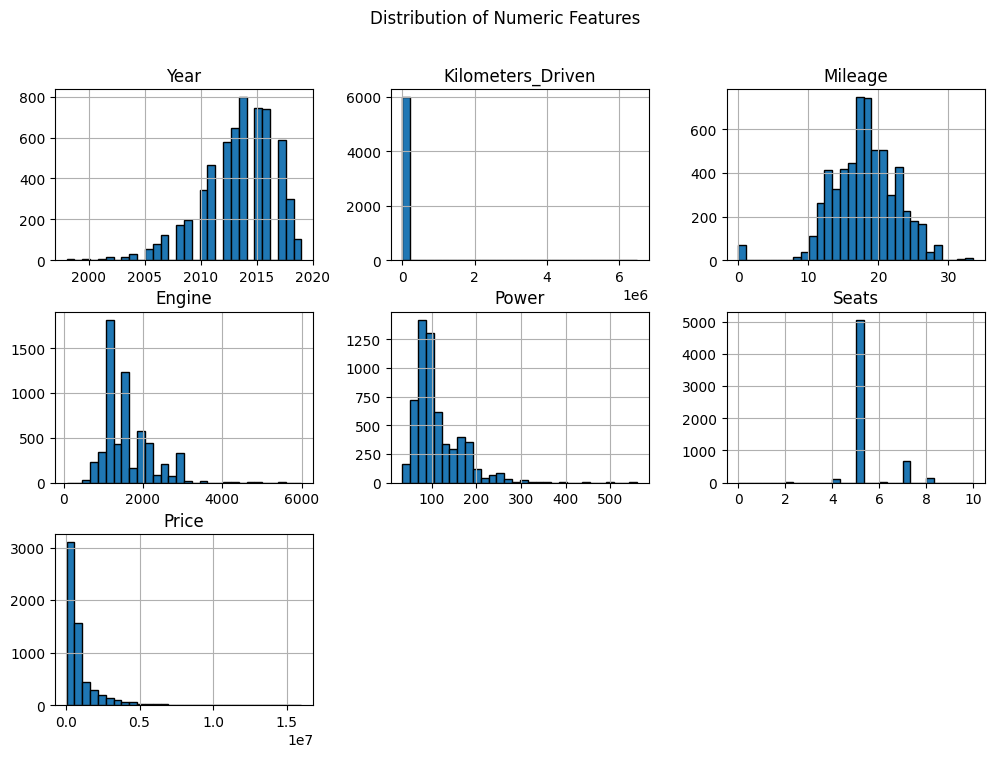

In [14]:
# Histograms for numerical columns
import matplotlib.pyplot as plt
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()

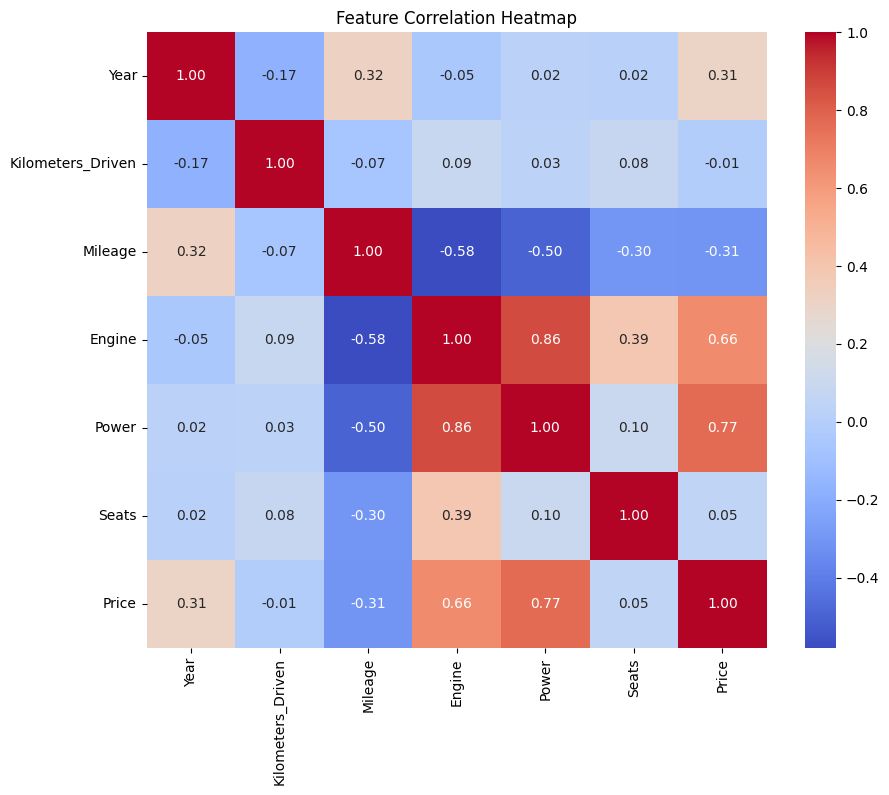

In [15]:
# Correlation Heatmap
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

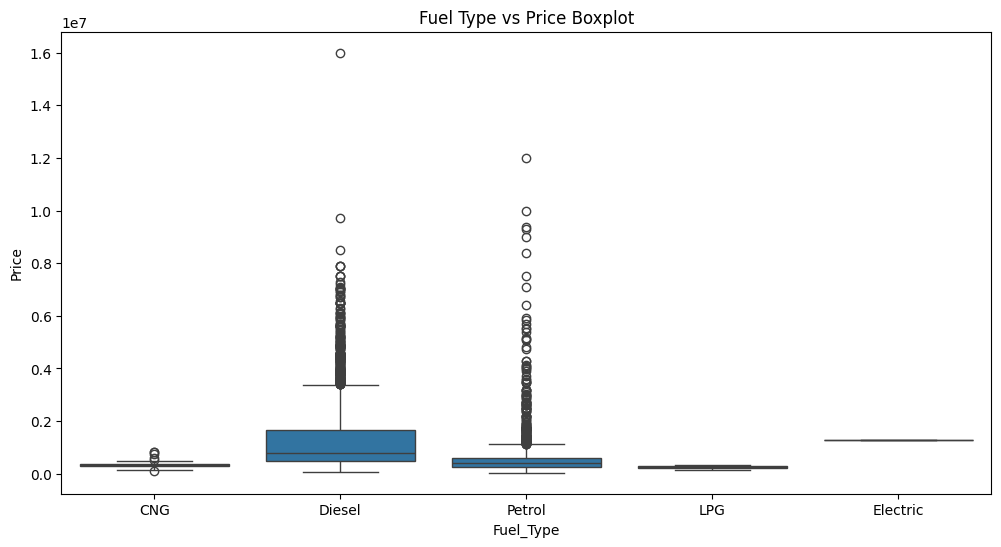

In [16]:
# Boxplot for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Fuel_Type'], y=df['Price'])
plt.title("Fuel Type vs Price Boxplot")
plt.show()

In [17]:
# Detect outliers using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))]
print(f"Outliers detected: {len(outliers)}")

# Remove outliers
df = df[~df.index.isin(outliers.index)]
print(f"Dataset size after outlier removal: {df.shape}")

Outliers detected: 718
Dataset size after outlier removal: (5301, 12)


In [24]:
import os

# Define the directory path
save_dir = "../processed"

# Check if the directory exists; if not, create it
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the cleaned dataset
df.to_csv(os.path.join(save_dir, "cleaned_used_car_data.csv"), index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.
